<a href="https://colab.research.google.com/github/Hebaade/ML-Models/blob/main/fruitt_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="jNidOrV5Xb30L6QlrfGd")
project = rf.workspace("fruit-detection-x2q1m").project("my-first-project-avlcu")
version = project.version(5)
dataset = version.download("yolov12")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to My-First-Project-5 in yolov12:: 100%|██████████| 11966/11966 [00:01<00:00, 7443.22it/s]


In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.1/112.6 GB disk)


In [ ]:
# Train YOLOv8n on Cancer for 100 epochs
!yolo task= detect mode= train data=/content/My-First-Project-5/data.yaml model=yolov8n.pt epochs=100 imgsz=640 batch=16


Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/My-First-Project-5/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

In [ ]:
from IPython.display import Image, display

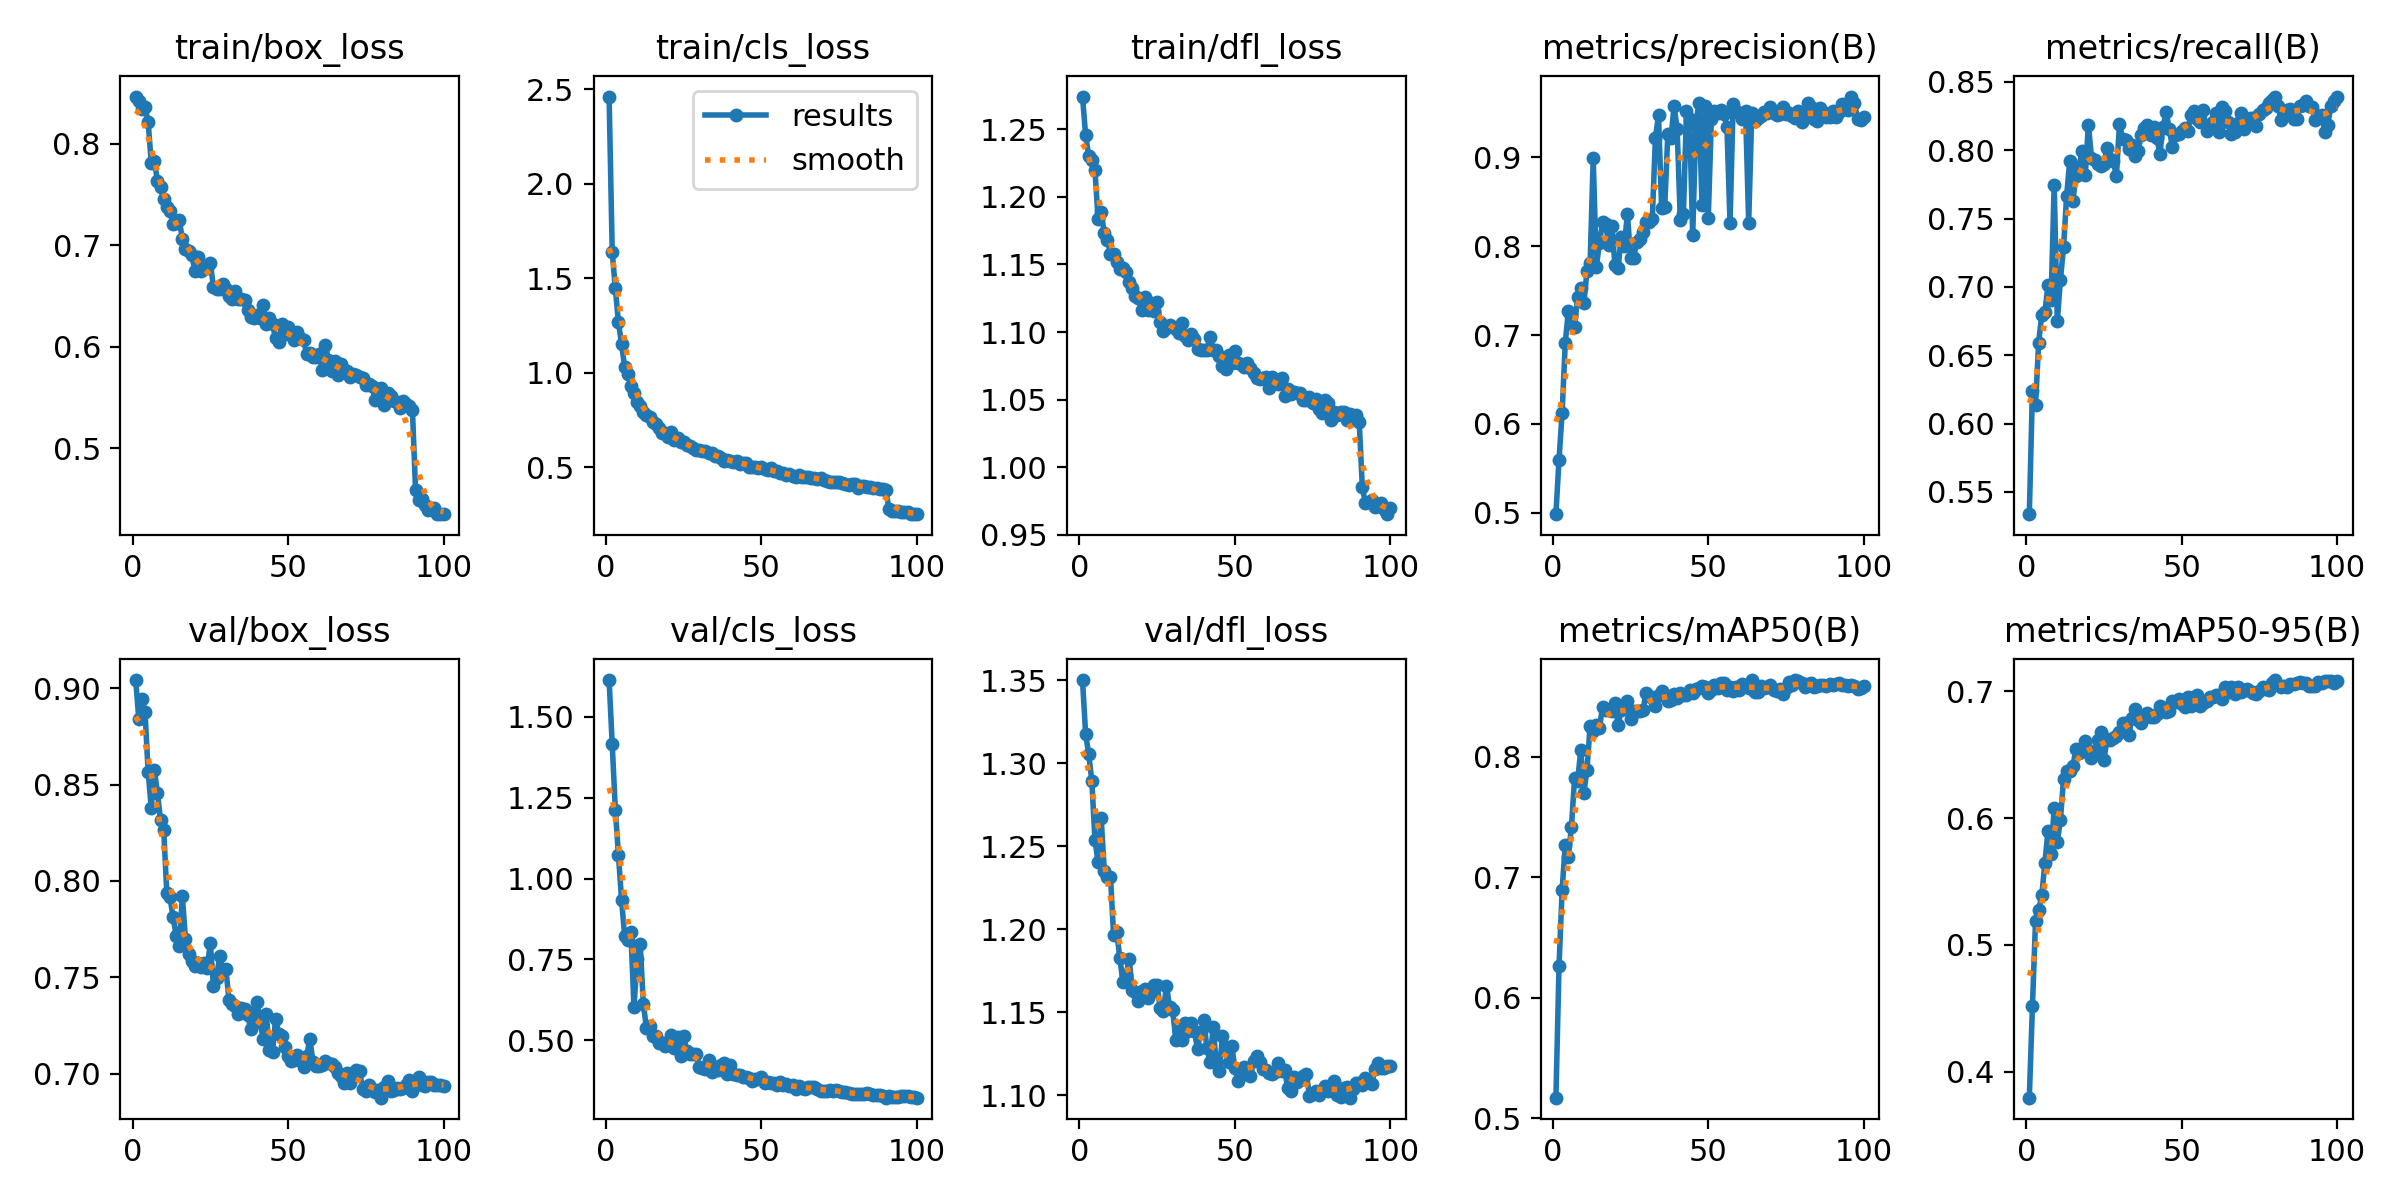

In [ ]:
display(Image(filename=f"/content/runs/detect/train2/results.png", width=1000))

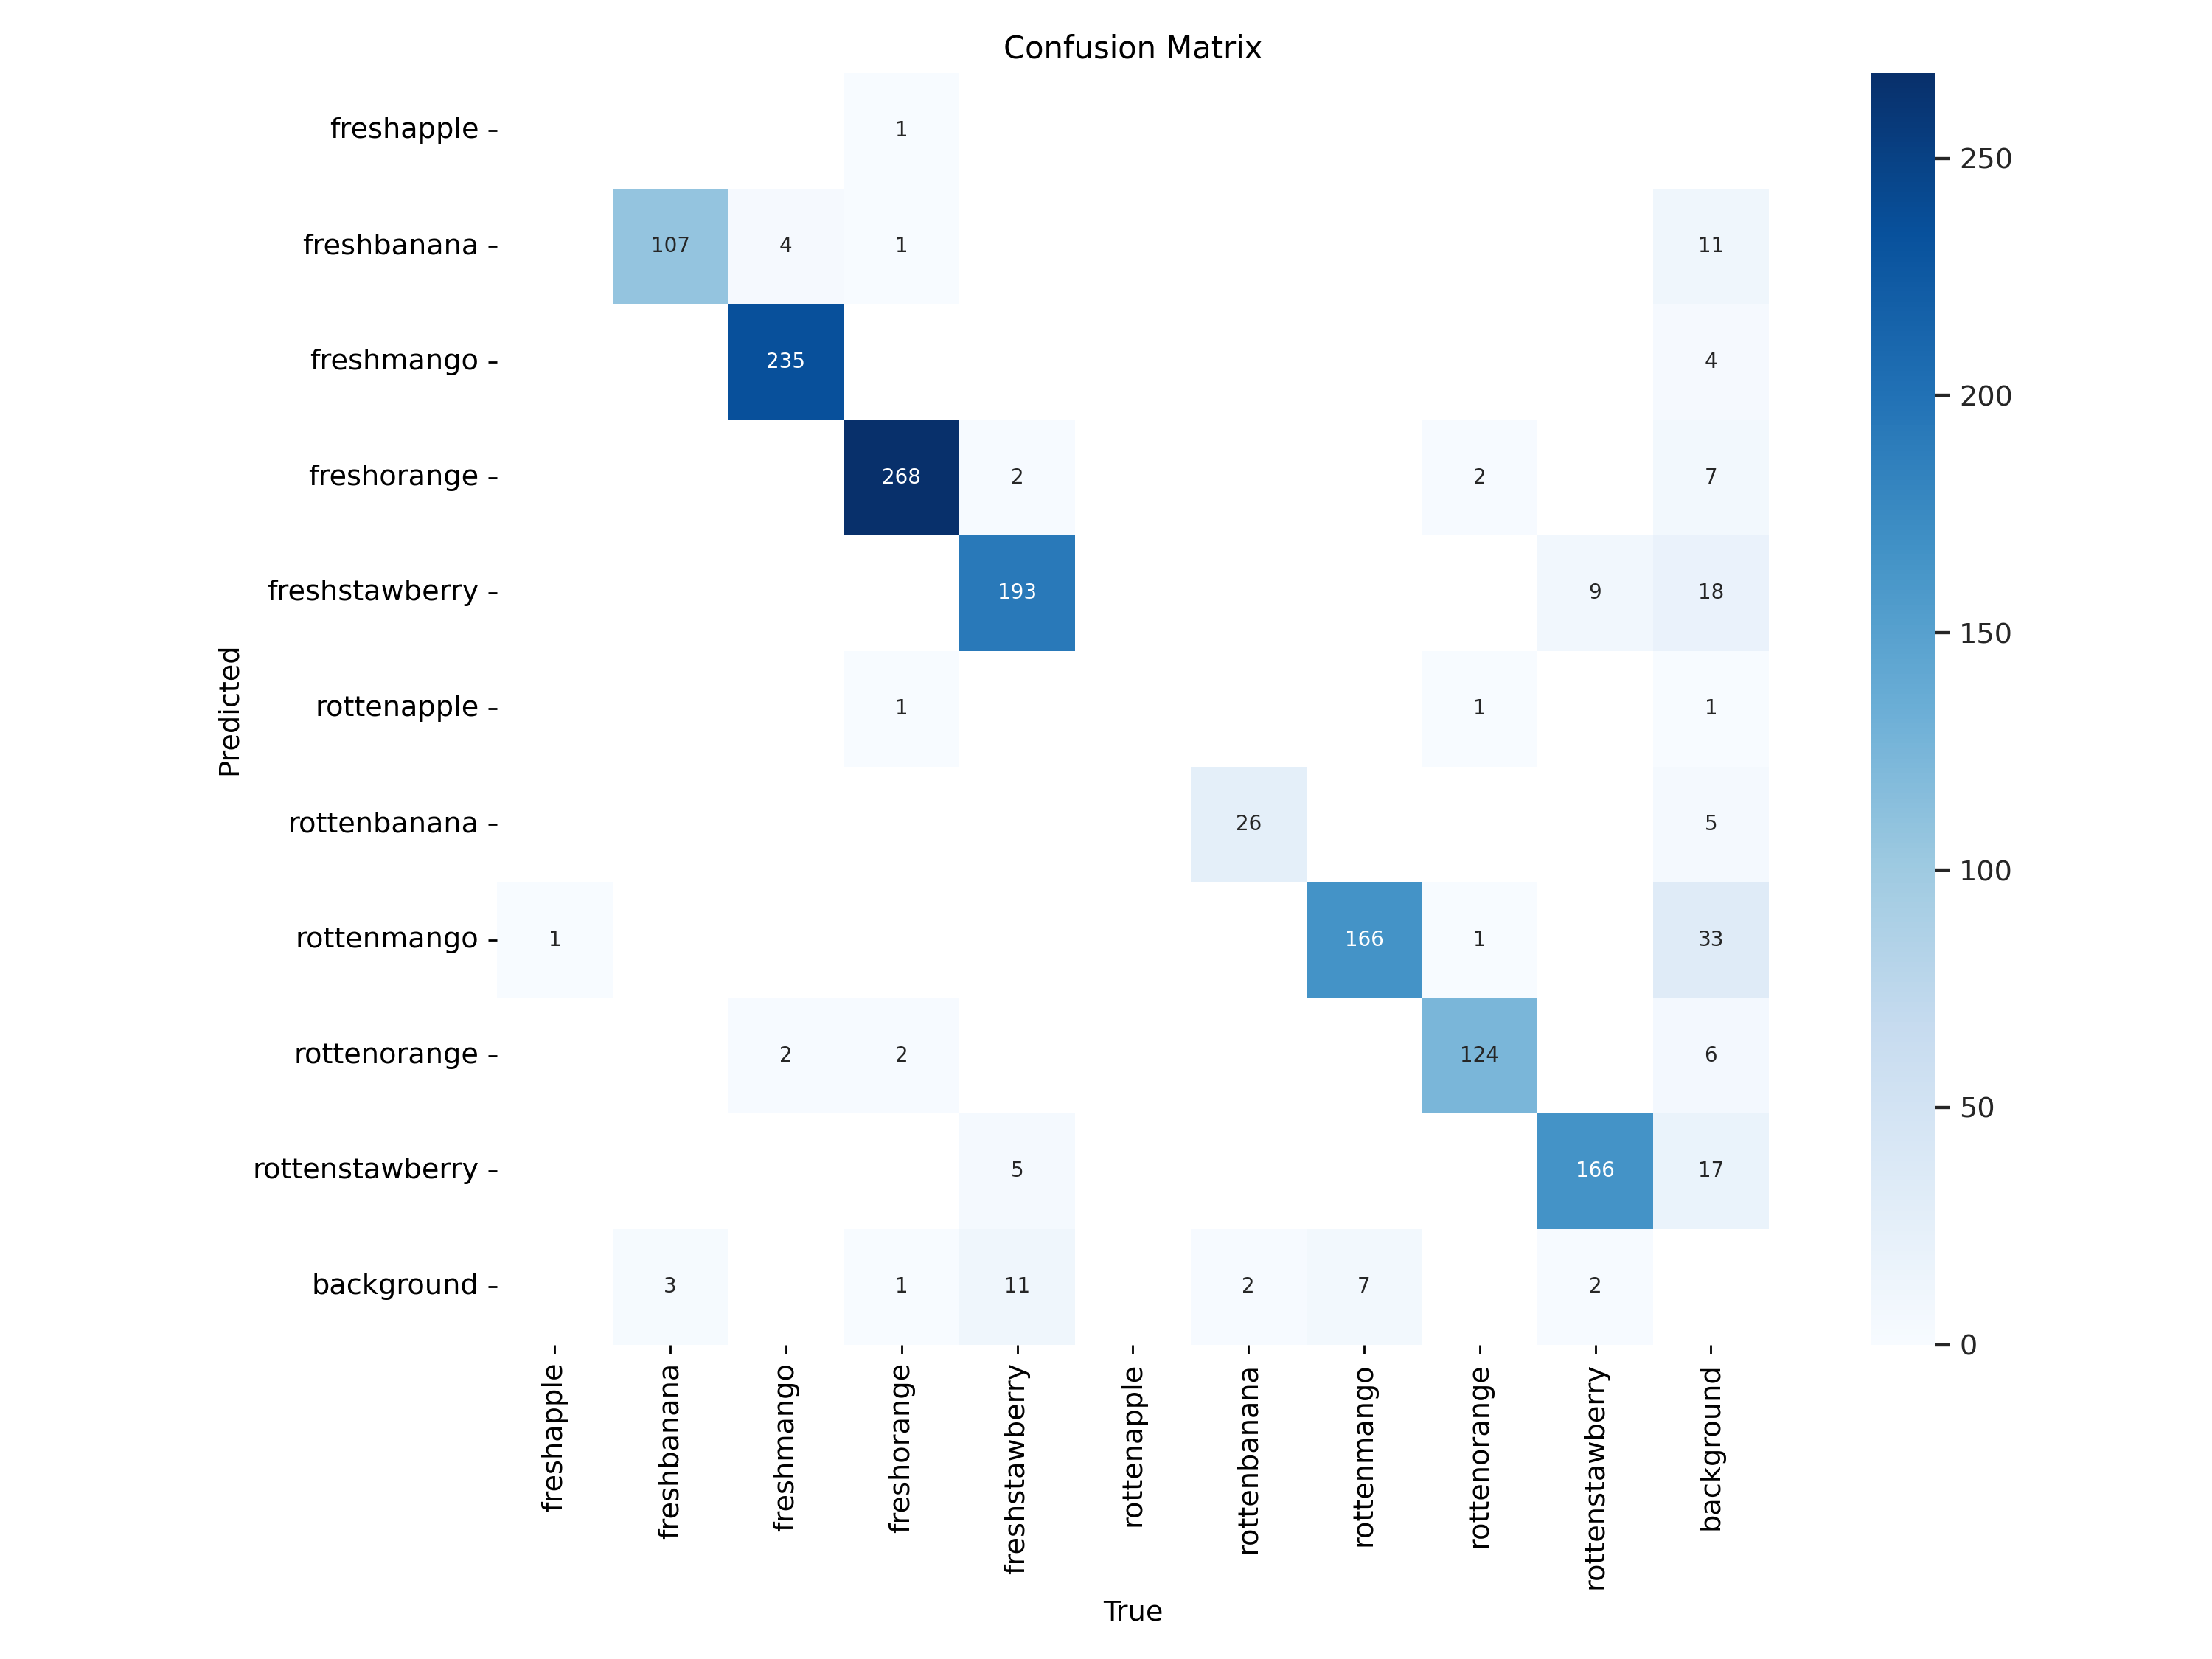

In [ ]:
display(Image(filename=f"/content/runs/detect/train2/confusion_matrix.png", width=1000))

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt imgsz=640 conf=0.5 \
data=/content/My-First-Project-5/data.yaml

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/My-First-Project-5/valid/labels.cache... 770 images, 1 backgrounds, 0 corrupt: 100% 770/770 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 49/49 [00:08<00:00,  5.67it/s]
                   all        770       1343      0.842      0.825      0.851      0.723
            freshapple          1          1          0          0          0          0
           freshbanana         41        110       0.92      0.918      0.957       0.83
            freshmango        121        241      0.992      0.975      0.987      0.959
           freshorange        122        274      0.989      0.971      0.984      0.904
        freshstawberry        125        211      0.917      0.834       0.89      0.499
          rottenbanana         10         28 

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt imgsz=640 conf=0.5 \
source=/content/My-First-Project-5/test/images

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs

image 1/414 /content/My-First-Project-5/test/images/freshBanana-119-_jpg.rf.b139a9bf5bc2db046511075902d77675.jpg: 640x640 1 freshbanana, 8.8ms
image 2/414 /content/My-First-Project-5/test/images/freshBanana-12-_jpg.rf.df448479804f089a848265e8ddba9052.jpg: 640x640 3 freshbananas, 7.5ms
image 3/414 /content/My-First-Project-5/test/images/freshBanana-121-_png.rf.6819fd0ab00b44258af777568f232cf9.jpg: 640x640 7 freshbananas, 7.4ms
image 4/414 /content/My-First-Project-5/test/images/freshBanana-128-_png.rf.b7de6cf491ab1ee1d596dceb081ac9c3.jpg: 640x640 4 freshbananas, 7.4ms
image 5/414 /content/My-First-Project-5/test/images/freshBanana-129-_png.rf.f5efd38eb3f88e8c313635d948fdf596.jpg: 640x640 6 freshbananas, 7.4ms
image 6/414 /content/My-First-Project-5/test/images/freshBanana-130-_png.rf.b1336788efa8cde55081417979dd292b.jpg: 640x

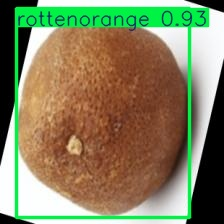

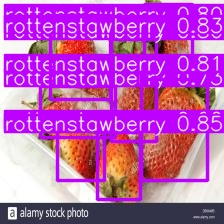

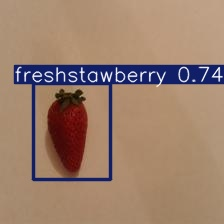

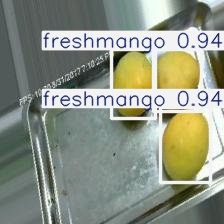

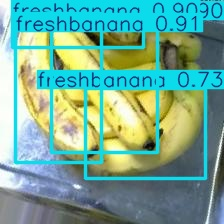

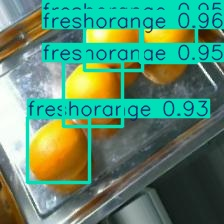

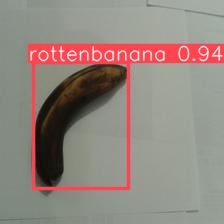

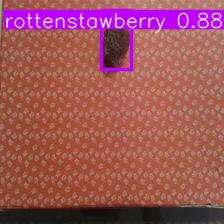

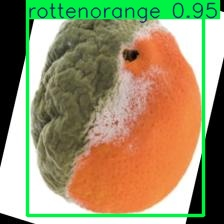

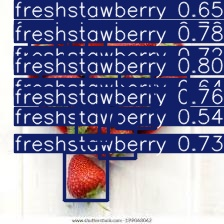

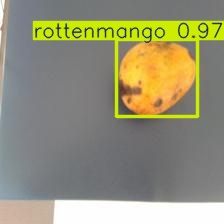

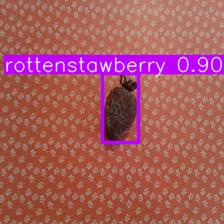

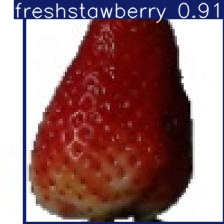

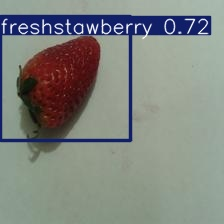

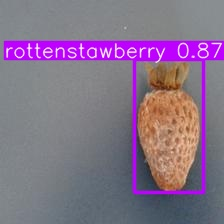

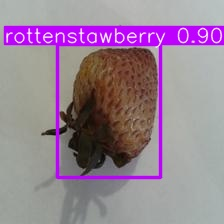

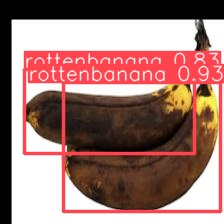

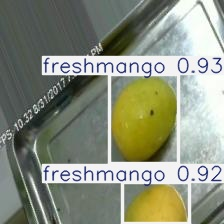

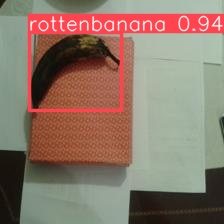

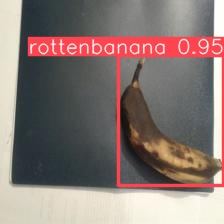

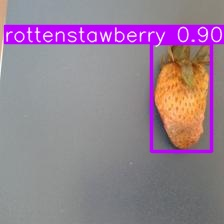

In [ ]:
# Display inference on ALL test images
import glob
from IPython.display import Image, display
i = 0
for imageName in glob.glob("runs/detect/predict/*.jpg"): #assuming JPG
    if i %20 == 0 :
        print("\n")
        display(Image(filename=imageName))
    i = i +1


In [ ]:
import shutil

shutil.copytree("/content/runs", "/content/My-First-Project-5/output", dirs_exist_ok=True)

'/content/My-First-Project-5/output'

In [ ]:
# Train YOLOv8n for 20 epochs
!yolo task= detect mode= train data=/content/My-First-Project-5/data.yaml \
model=/content/My-First-Project-5/output/detect/train2/weights/best.pt epochs=20 imgsz=640 batch=16


Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/My-First-Project-5/output/detect/train2/weights/best.pt, data=/content/My-First-Project-5/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=F

In [ ]:
!pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 6.2 MB/s eta 0:00:00


In [ ]:
def callback(image: np.ndarray) -> sv.Detections:
    # Run inference
    results = model(image)

    # Extract the detections (assumes results[0] contains the necessary data)
    detections = results[0]  # Get the first result

    # Extract the bounding boxes, class IDs, and confidence scores
    # Move tensors to CPU before converting to NumPy
    boxes = detections.boxes.xyxy.cpu().numpy()  # Bounding boxes in (x1, y1, x2, y2) format
    class_ids = detections.boxes.cls.cpu().numpy()  # Class IDs
    scores = detections.boxes.conf.cpu().numpy()  # Confidence scores

    # Create sv.Detections object
    detections_sv = sv.Detections(
        xyxy=boxes,  # Convert to numpy array
        confidence=scores,
        class_id=class_ids
    )

    # Optionally filter out background (class_id == 0)
    detections_sv = detections_sv[detections_sv.class_id != 0]

    return detections_sv  # Return sv.Detections object


0: 640x640 4 freshoranges, 8.6ms
Speed: 3.6ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 rottenorange, 7.4ms
Speed: 2.7ms preprocess, 7.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 rottenorange, 7.4ms
Speed: 2.8ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 freshoranges, 7.4ms
Speed: 2.8ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 freshorange, 7.4ms
Speed: 2.8ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 freshmango, 7.4ms
Speed: 3.0ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 freshmangos, 7.4ms
Speed: 2.9ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 rottenstawberry, 7.4ms
Speed: 3.0ms preprocess, 7.4ms inference, 1.1ms postproce

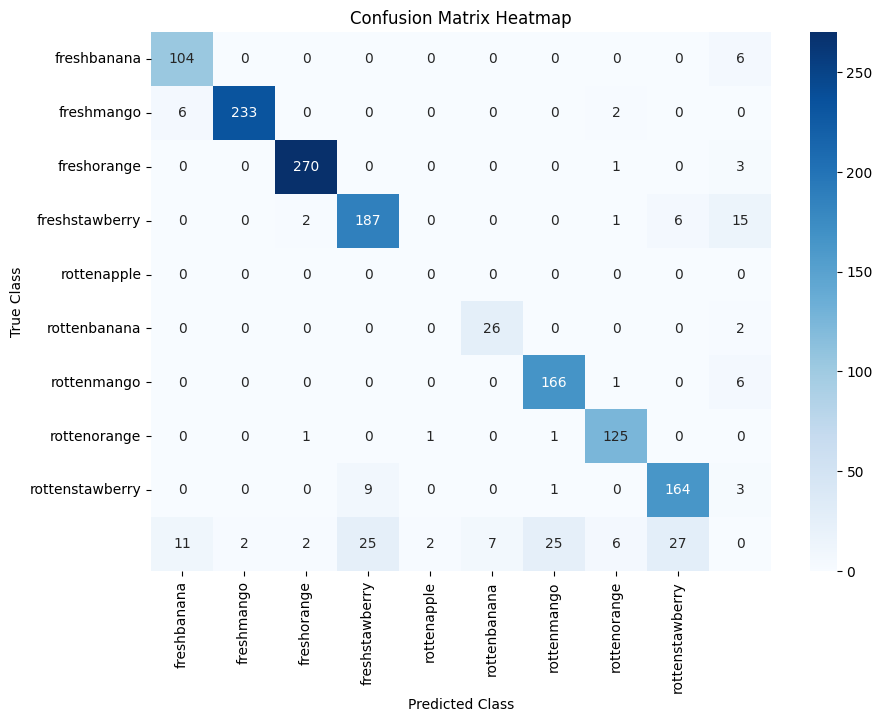

Normalized Confusion Matrix:
[[    0.94545           0           0           0           0           0           0           0           0    0.054545]
 [   0.024896      0.9668           0           0           0           0           0   0.0082988           0           0]
 [          0           0      0.9854           0           0           0           0   0.0036496           0    0.010949]
 [          0           0   0.0094787     0.88626           0           0           0   0.0047393    0.028436     0.07109]
 [        nan         nan         nan         nan         nan         nan         nan         nan         nan         nan]
 [          0           0           0           0           0     0.92857           0           0           0    0.071429]
 [          0           0           0           0           0           0     0.95954   0.0057803           0    0.034682]
 [          0           0   0.0078125           0   0.0078125           0   0.0078125     0.97656           0 

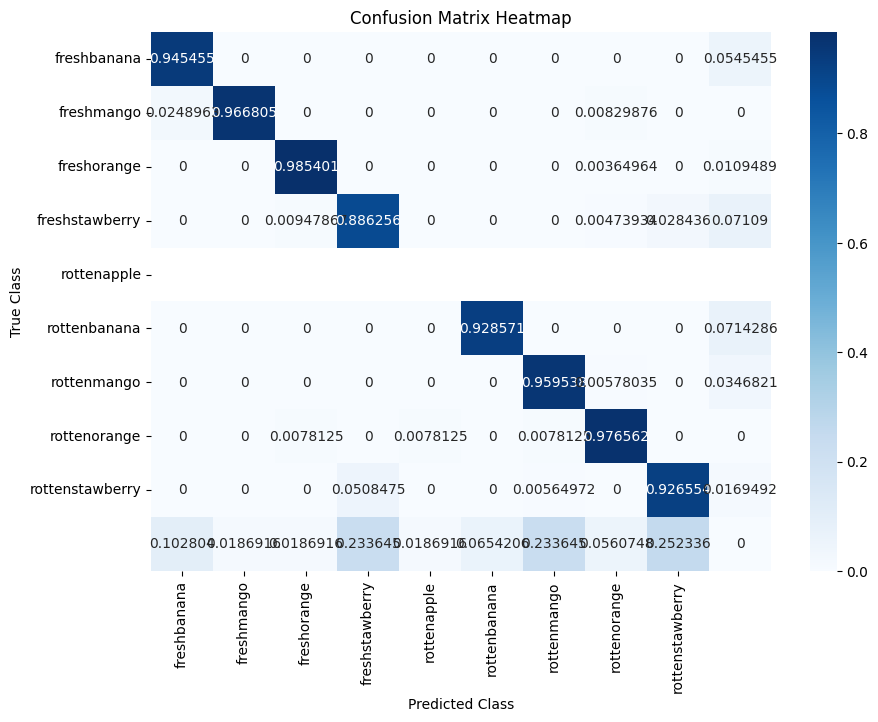

In [ ]:
import numpy as np
import supervision as sv
import torch
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from ultralytics import YOLO

%matplotlib inline

# Load YOLOv8 model
model = YOLO('/content/runs/detect/train4/weights/best.pt')

# Define the root dataset path (must contain 'images' and 'labels' folders)
dataset_root = '/content/My-First-Project-5/valid/'

# Create a detection dataset from YOLO format
dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=dataset_root + "images",
    annotations_directory_path=dataset_root + "labels",
    data_yaml_path='/content/My-First-Project-5/data.yaml'
)

def callback(image: np.ndarray) -> sv.Detections:
    # Run inference
    results = model(image)

    # Extract the detections (assumes results[0] contains the necessary data)
    detections = results[0]  # Get the first result

    # Extract the bounding boxes, class IDs, and confidence scores
    # Move tensors to CPU before converting to NumPy
    boxes = detections.boxes.xyxy.cpu().numpy()  # Bounding boxes in (x1, y1, x2, y2) format
    class_ids = detections.boxes.cls.cpu().numpy()  # Class IDs
    scores = detections.boxes.conf.cpu().numpy()  # Confidence scores

    # Create sv.Detections object
    detections_sv = sv.Detections(
        xyxy=boxes,  # Convert to numpy array
        confidence=scores,
        class_id=class_ids
    )

    # Optionally filter out background (class_id == 0)
    #detections_sv = detections_sv[detections_sv.class_id != 0] # Removed this line

    return detections_sv  # Return sv.Detections object

# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.title("Confusion Matrix Heatmap")
    plt.show()

# Benchmark the confusion matrix (background class is already ignored)
confusion_matrix = sv.ConfusionMatrix.benchmark(
    dataset=dataset,
    callback=callback
)

# Print class information (without background)
print("Classes (without background):")
class_names = dataset.classes[1:] # Exclude background class
print(class_names)


# Adjust confusion matrix to ignore background
confusion_matrix = confusion_matrix.matrix[1:, 1:] # Assuming the first row/column is background
# Print the confusion matrix
print("Confusion Matrix (without background):")
print(confusion_matrix)

# Plot the raw confusion matrix
plot_confusion_matrix(confusion_matrix, class_names)

# Normalize the confusion matrix
def normalize_confusion_matrix(matrix):
    return matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Optionally normalize the confusion matrix
normalized_matrix = normalize_confusion_matrix(confusion_matrix)
print("Normalized Confusion Matrix:")
print(normalized_matrix)

# Plot the normalized confusion matrix
plot_confusion_matrix(normalized_matrix, class_names)